In [77]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
df = pd.read_csv('train.csv')
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


<h2 align='center'>Handling missing values<h2>

<h3 > 1) Total missing values in each column<h3>

In [6]:
df.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

<h3> 2) Handling missing Age values <h3>

##### 2.1) Numerical Columns (Replace with mean)

In [7]:
df['Age'].fillna(df['Age'].mean(), inplace=True)

C:\Users\FATTANI COMPUTERS\AppData\Local\Temp\ipykernel_9152\1698716155.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Age'].fillna(df['Age'].mean(), inplace=True)


##### 2.2) Categorical Columns (Replace with mode)

In [8]:
df['Cabin'].fillna(df['Cabin'].mode()[0], inplace=True)
df['Embarked'].fillna(df['Embarked'].mode()[0], inplace=True)

C:\Users\FATTANI COMPUTERS\AppData\Local\Temp\ipykernel_9152\2926053951.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Cabin'].fillna(df['Cabin'].mode()[0], inplace=True)
C:\Users\FATTANI COMPUTERS\AppData\Local\Temp\ipykernel_9152\2926053951.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values alway

<h2 align='center'>Converting Types<h2>

### 1) Column Datatypes

In [9]:
df.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

### 2) Converting text columns (Sex, Embarked) to int64


In [10]:
df['Sex'] = df['Sex'].map({ 'female': 0, 'male': 1})
df['Embarked'] = df['Embarked'].map({'S': 0, 'C': 1, 'Q': 2})

### 2.1) Converting columns datatype from int64 to uint8 for memory effeciency


In [11]:
df[['Survived', 'Pclass', 'Sex', 'SibSp', 'Parch', 'Embarked']] = df[['Survived', 'Pclass', 'Sex', 'SibSp', 'Parch', 'Embarked']].astype('uint8')

In [12]:
df.dtypes

PassengerId      int64
Survived         uint8
Pclass           uint8
Name            object
Sex              uint8
Age            float64
SibSp            uint8
Parch            uint8
Ticket          object
Fare           float64
Cabin           object
Embarked         uint8
dtype: object

<h2 align='center'>Summary statistics and group-based insights<h2>

### Survival summary

In [13]:
survival_summary = df['Survived'].value_counts().sort_index()
survival_summary

Survived
0    549
1    342
Name: count, dtype: int64

### Total number of passengers and survivers within classes

In [14]:
passengers_per_class = df['Pclass'].value_counts().sort_index()
passengers_survived_per_class = df.groupby('Pclass')['Survived'].sum().sort_index()
passengers_per_class
passengers_survived_per_class

Pclass
1    136
2     87
3    119
Name: Survived, dtype: uint8

### Visualizing number of passengers within classes

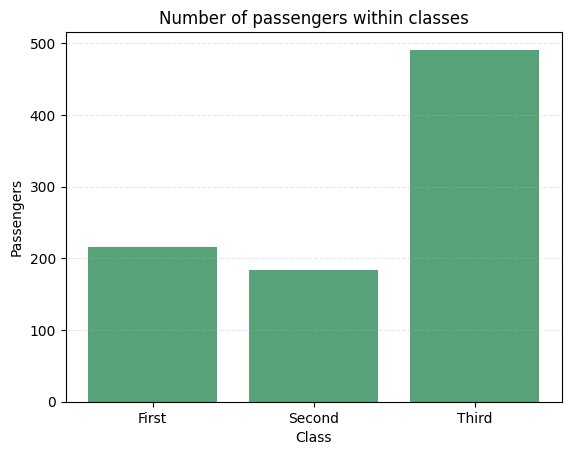

In [15]:
classes = passengers_per_class.index
passengers = passengers_per_class.values
plt.bar(classes, passengers, color='seagreen', alpha=0.8)
plt.xticks(ticks=[1, 2, 3], labels=['First', 'Second', 'Third'])
plt.title('Number of passengers within classes')
plt.xlabel('Class')
plt.ylabel('Passengers')
plt.grid(axis='y', linestyle='--', alpha=0.3)
plt.show()

### Calculating survival rates of each classes

In [16]:
class_survival_rate = (passengers_survived_per_class / passengers_per_class) * 100
class_survival_rate

Pclass
1    62.962963
2    47.282609
3    24.236253
dtype: float64

### Visualizing survival rates of a class

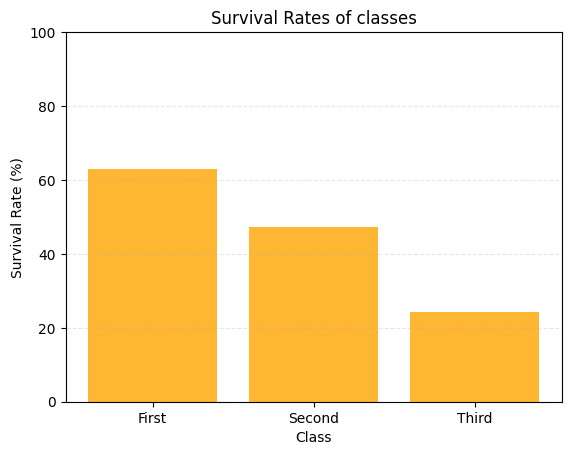

In [17]:
plt.bar(classes, class_survival_rate, color='orange', alpha=0.8)
plt.xlabel('Class')
plt.ylabel('Survival Rate (%)')
plt.ylim(0, 100)
plt.title('Survival Rates of classes')
plt.xticks(ticks=[1, 2, 3], labels=['First', 'Second', 'Third'])
plt.grid(axis='y', linestyle='--', alpha=0.3)
plt.show()

### Calculating percentage of survivors by classes

In [18]:
percentage_of_survivors_by_class = (passengers_survived_per_class / survival_summary[1]) * 100
percentage_of_survivors_by_class

Pclass
1    39.766082
2    25.438596
3    34.795322
Name: Survived, dtype: float64

### Visualizing percentage of survivors by classes

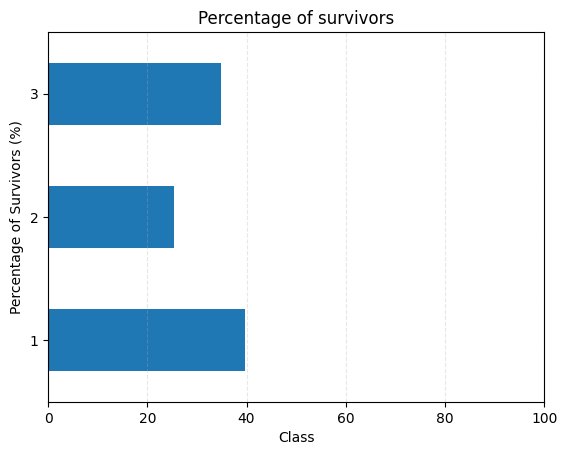

In [ ]:
percentage_of_survivors_by_class.plot(kind='barh', title='Percentage of survivors')
plt.xlabel('Class')
plt.ylabel('Percentage of Survivors (%)')
plt.xlim(0, 100)
plt.grid(axis='x', linestyle='--', alpha=0.3)
plt.show()

### Total Passengers and Survivers within each gender

In [21]:
passengers_per_gender = df['Sex'].value_counts().sort_index()
passengers_survived_per_gender = df.groupby('Sex')['Survived'].sum()
# passengers_per_gender
passengers_survived_per_gender

Sex
0    233
1    109
Name: Survived, dtype: uint8

### Visualizing number of passengers per genders

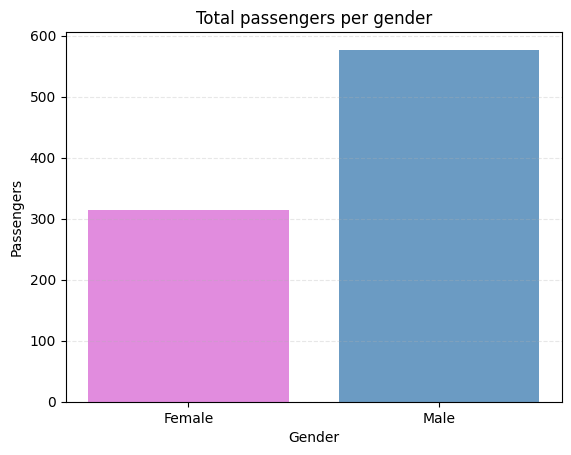

In [22]:
genders = passengers_per_gender.index
passengers = passengers_per_gender.values
plt.bar(genders, passengers, color=['orchid','steelblue'] , alpha=0.8)
plt.xlabel('Gender')
plt.ylabel('Passengers')
plt.title('Total passengers per gender')
plt.xticks(ticks=[0, 1], labels=['Female', 'Male'])
plt.grid(axis='y', linestyle='--', alpha=0.3)
plt.show()

### Calculating survivial rates of genders

In [23]:
gender_wise_survival_rate = (passengers_survived_per_gender / passengers_per_gender) * 100
gender_wise_survival_rate

Sex
0    74.203822
1    18.890815
dtype: float64

### Visualizing survival rates of genders

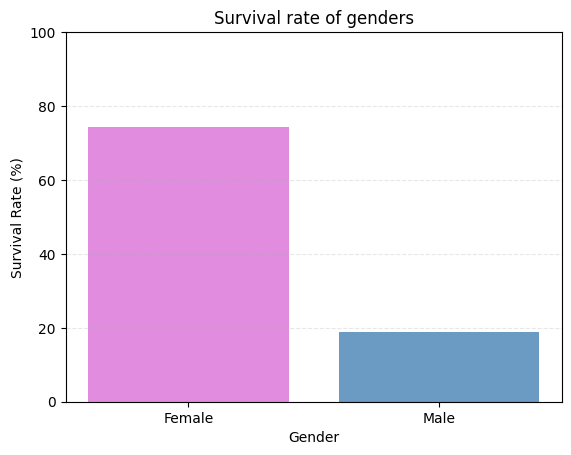

In [43]:
plt.bar(genders, gender_wise_survival_rate, color=['orchid','steelblue'], alpha=0.8)
plt.xlabel('Gender')
plt.ylabel('Survival Rate (%)')
plt.ylim(0, 100)
plt.title('Survival rate of genders')
plt.xticks(ticks=[0, 1], labels=['Female', 'Male'])
plt.grid(axis='y', linestyle='--', alpha=0.3)
plt.show()

### Calculating percentage of survivors by gender

In [25]:
percentage_of_survivors_by_gender = (passengers_survived_per_gender / survival_summary[1]) * 100
percentage_of_survivors_by_gender

Sex
0    68.128655
1    31.871345
Name: Survived, dtype: float64

### Visualizing percentage of survivors by gender

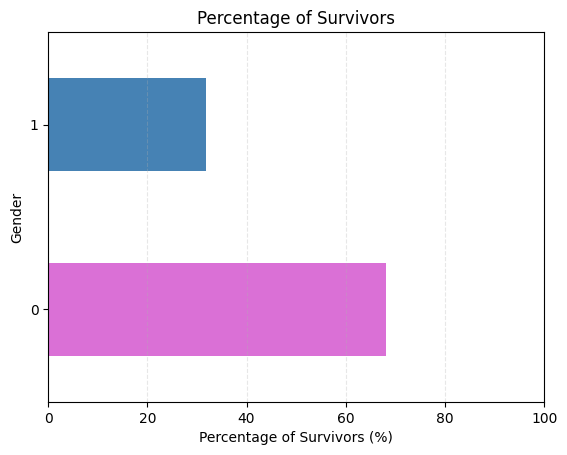

In [ ]:
percentage_of_survivors_by_gender.plot(kind='barh', color=['orchid','steelblue'], title='Percentage of Survivors')
plt.xlabel('Percentage of Survivors (%)')
plt.ylabel('Gender')
plt.xlim(0, 100)
plt.grid(axis='x', linestyle='--', alpha=0.3)
plt.show()

### Calculating and visualizing correlation among numerical columns in the dataset

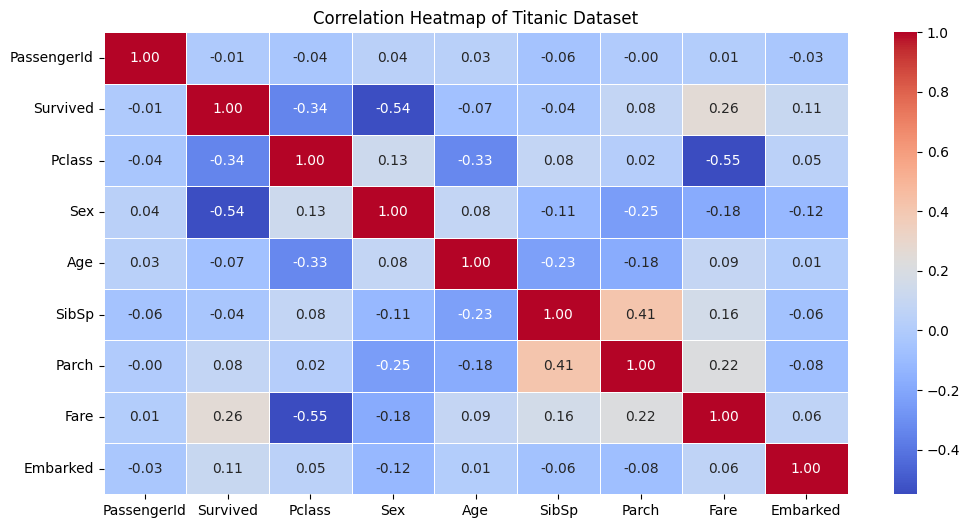

In [107]:
corr_matrix = df.corr(numeric_only=True)
plt.figure(figsize=(12, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Heatmap of Titanic Dataset')
plt.show()

In [113]:
plt.hist(df[df['Survived' == 1]], bins=50, color='lightblue', edgecolor='black', alpha=0.7)

KeyError: False